# Functions

In [33]:
import functions_paper_1
import importlib
from functions_paper_1 import *
exec(open("functions_paper_1.py").read())
# Local path to Sharepoint (on your computer, change if you are a different user)
datadir = Path(Path('../../datadir_srk.txt').read_text())
figure_folder = './figs_2024_promoter_editing_paper/20250129_ZF-Ab-stain/'

# Data

## Import Data

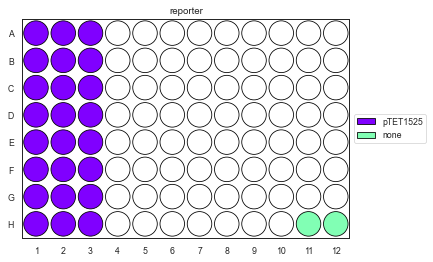

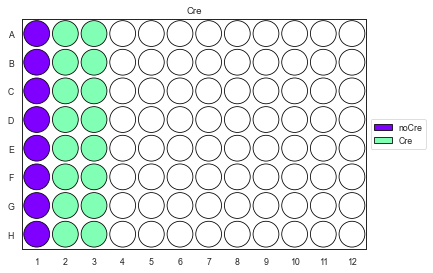

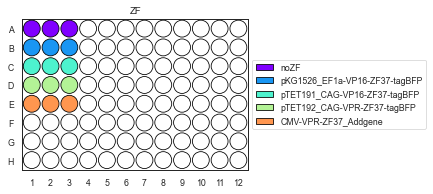

In [4]:
# Import Data - bioreplicate
folder = '20250129_Ab-stain-ZF-flag'
# instruments\data\attune\Mary\2024.08.26_exp09.16_minCMV\Plate2_minCMV_SRK\export_singlets
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata.yaml' #Assign yaml paths 
rd.plot.plot_well_metadata(yaml_path)
data1 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data1['bioreplicate'] = folder

## Concatenate data, promoter assignment

In [5]:
data = pd.concat( [data1], ignore_index=True)
data = data[ data['mCherry-A'] >0]
data = data[ data['mGL-A'] >0]
data = data[ data['TagBFP-A'] >0]
data = data[ data['AlexaFluor 555-A'] >0]
data = data[ data['iRFP670-A'] >0]

iRFPgate = 10000 
data_iRFP670gated = data[ (data['iRFP670-A']>iRFPgate) & (data['reporter']!='none') 
                         & (data['reporter']!='TET-AIO-mchHR')]
data_neg = data[ data['reporter']=='none' ]


# Histograms

## Palette

In [ ]:
palette = { 'noCre': 'lightgray', 'Cre': 'black' }

# Joint Histograms

In [ ]:
display( pd.unique( data_iRFP670gated['reporter'] ) )
display( pd.unique( data_iRFP670gated['ZF'] ) )
display( pd.unique( data_iRFP670gated['Cre']) )

2277


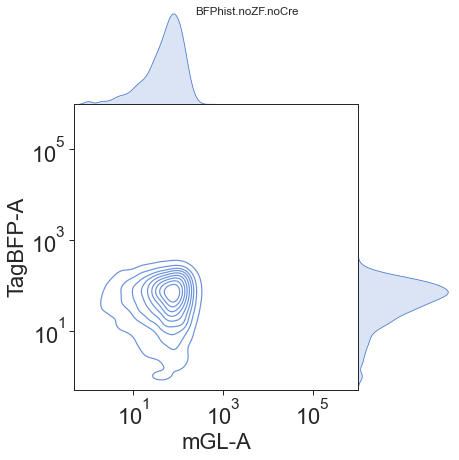

2277


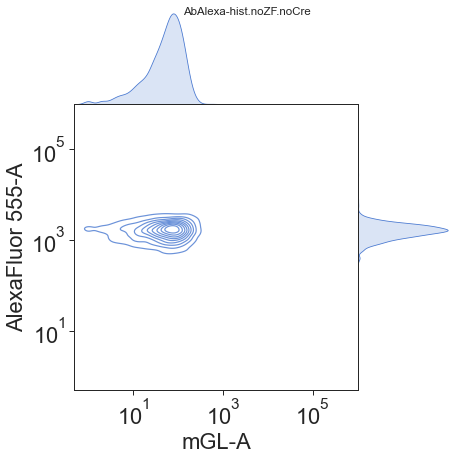

2277


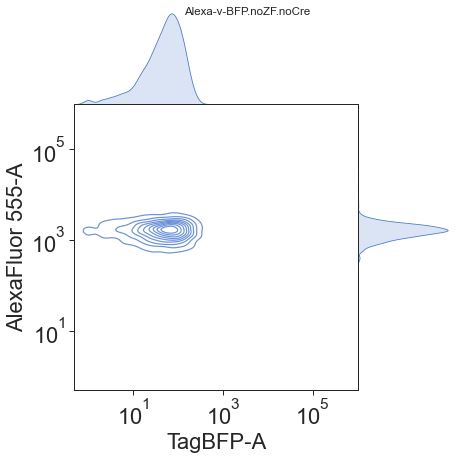

2515


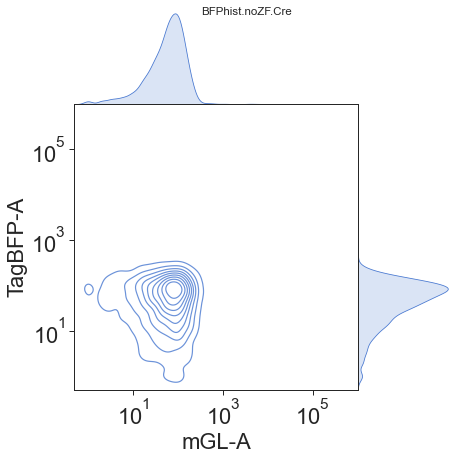

2515


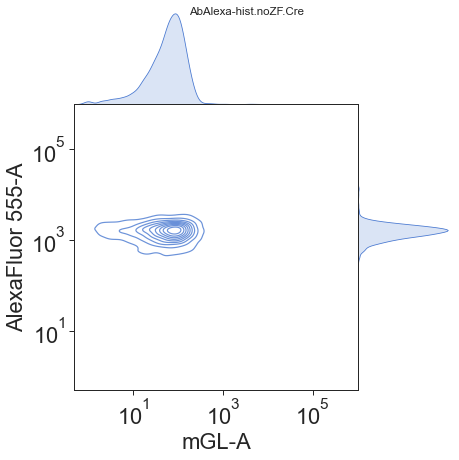

2515


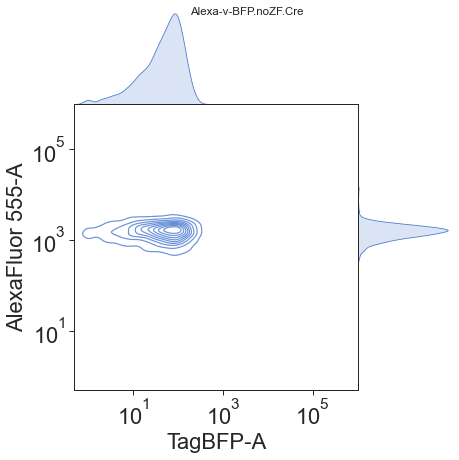

6008


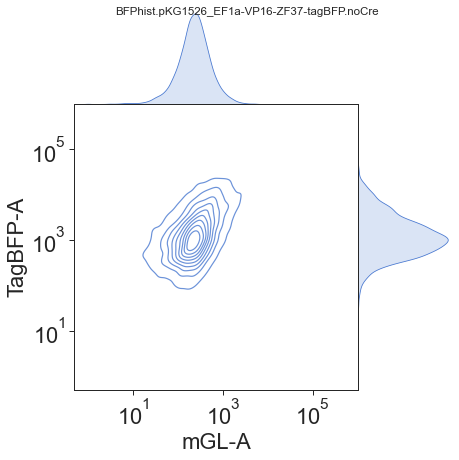

6008


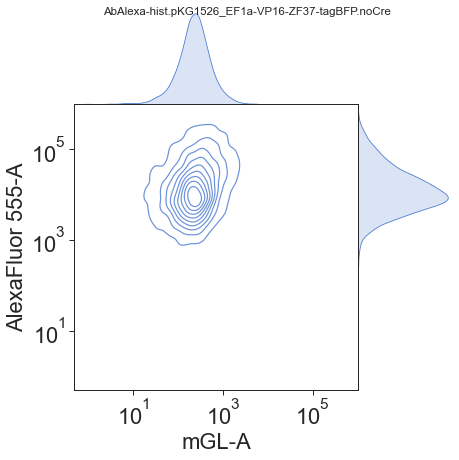

6008


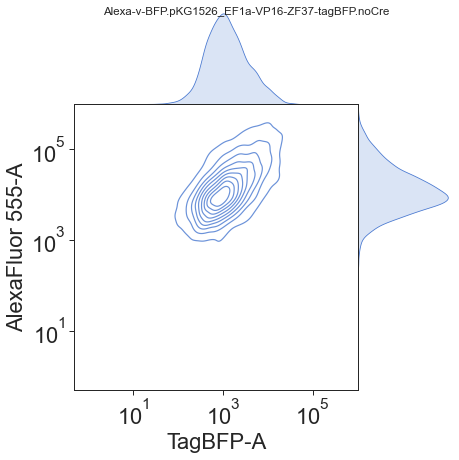

8537


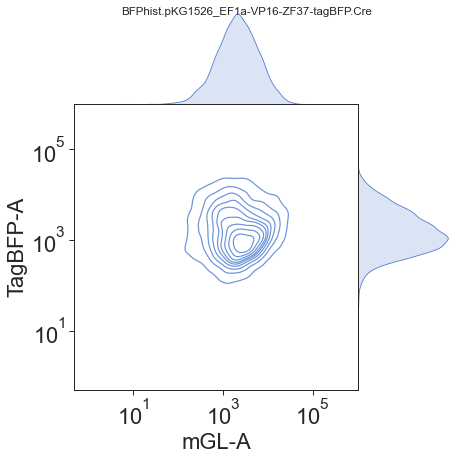

8537


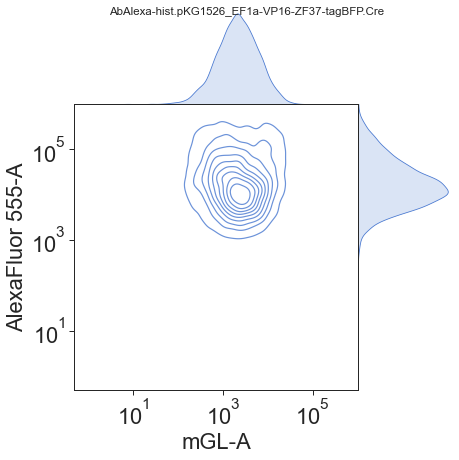

8537


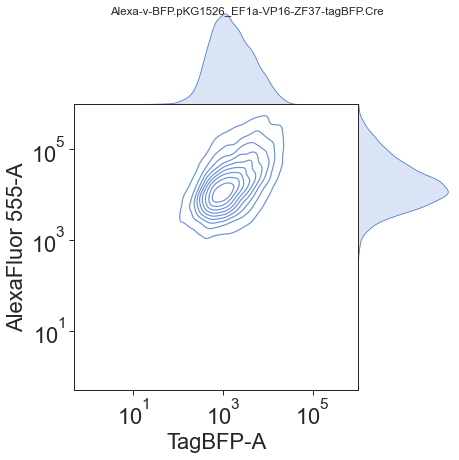

8652


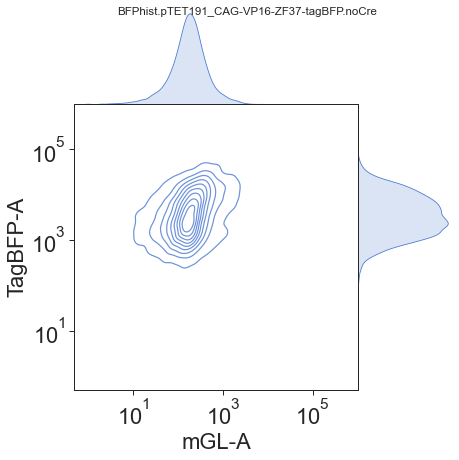

8652


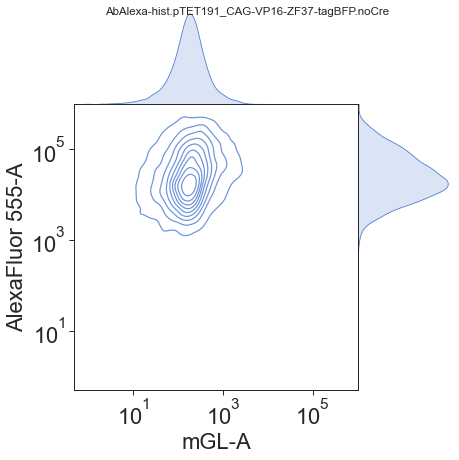

8652


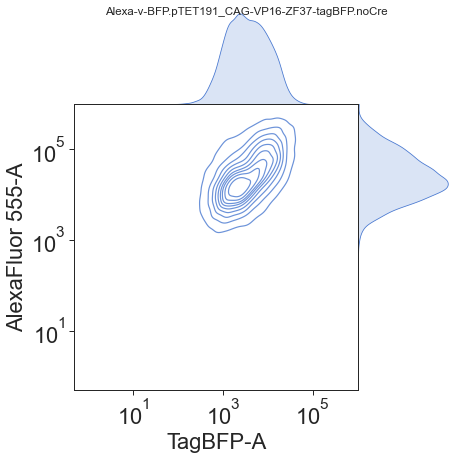

5968


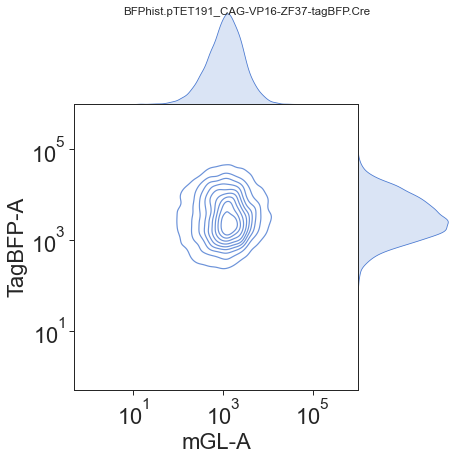

5968


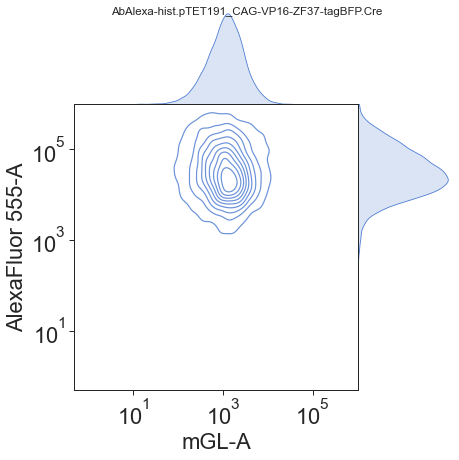

5968


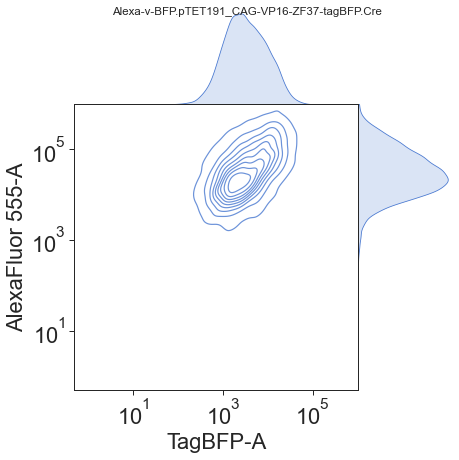

1477


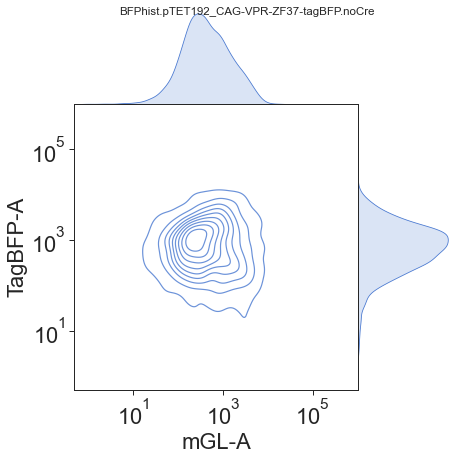

1477


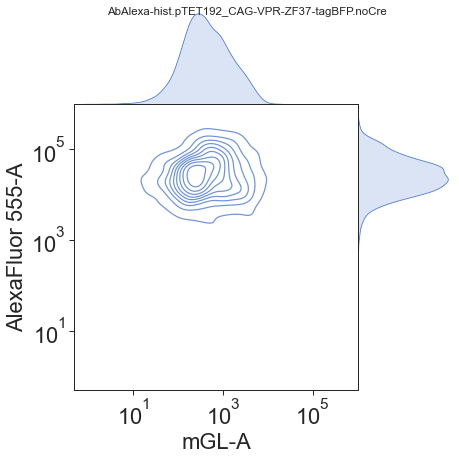

1477


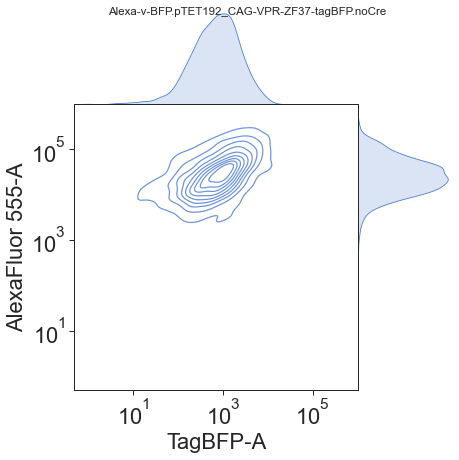

598


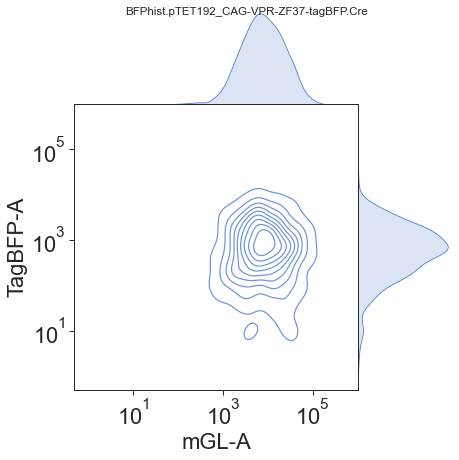

598


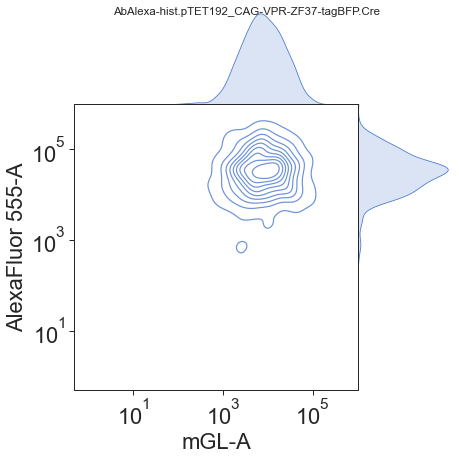

598


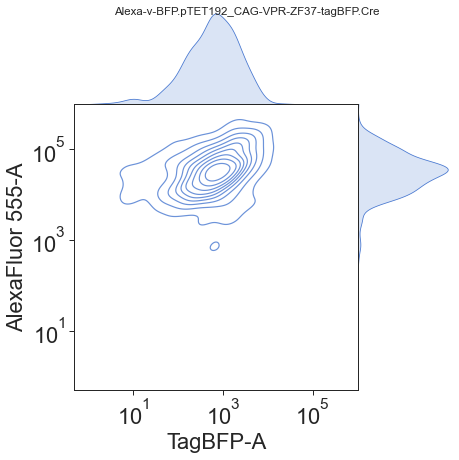

1133


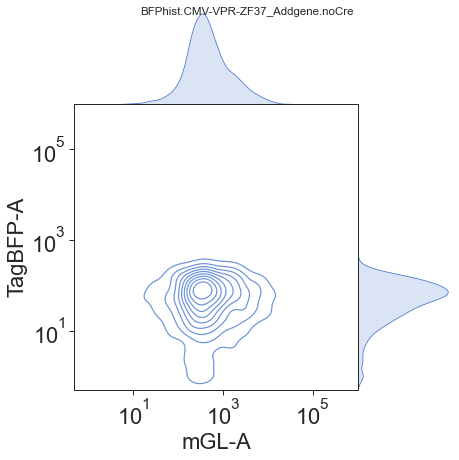

1133


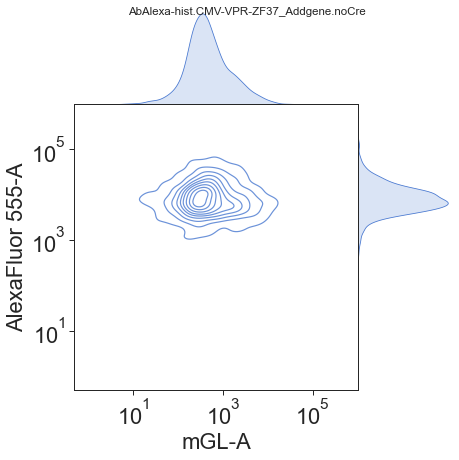

1133


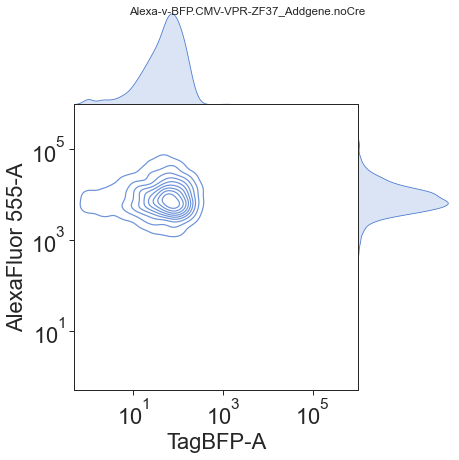

436


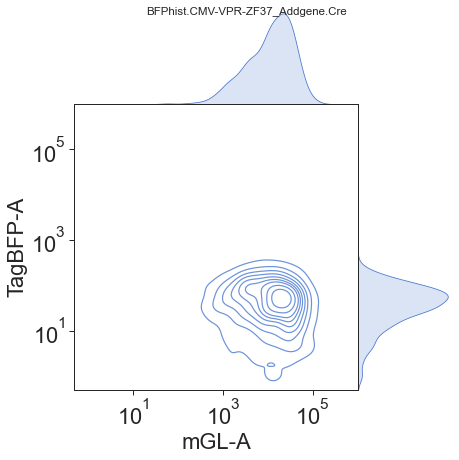

436


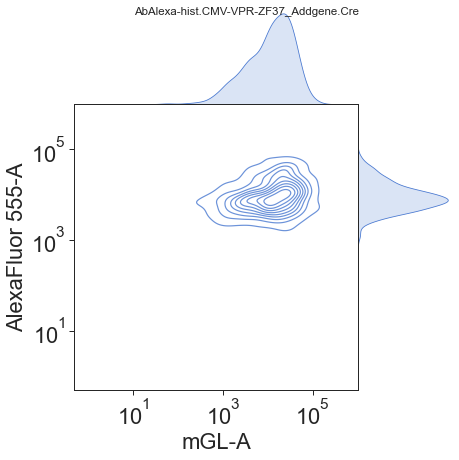

436


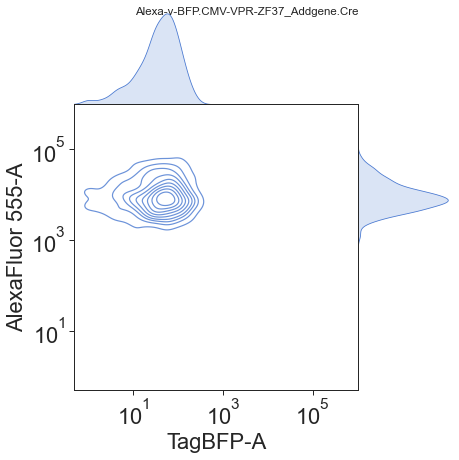

In [31]:
#Create conditions dictionary

hue = 'ZF'

for ZF in pd.unique(data_iRFP670gated['ZF']):
    data_now = data_iRFP670gated[ data_iRFP670gated['ZF']==ZF]
    for Cre in pd.unique(data_iRFP670gated['Cre']):
        data_now_now = data_now[ data_now['Cre']==Cre]
        conditions = {}
        
        plottitle = 'BFPhist.' + ZF + '.' + Cre
        h= custom_density_plot(xcat='mGL-A',ycat='TagBFP-A',hue='Cre',data=data_now_now,points = 1e6, 
                        hue_order=None,
                        savetitle='',plottitle=plottitle,palette='muted',
                        xlim=(0.5*10**0, 1*10**6),ylim = (0.5*10**0, 1*10**6),
                        type=['contour'], alpha=0.2, legend=False,
                        hline=False,              # Horizontal line to be added to the plot (float)
                        vline=False,               # Vertical line to be added to the plot (float)
                        sample=False)
        h.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

        plottitle = 'AbAlexa-hist.' + ZF + '.' + Cre
        h= custom_density_plot(xcat='mGL-A',ycat='AlexaFluor 555-A',hue='Cre',data=data_now_now,points = 1e6, 
                        hue_order=None,
                        savetitle='',plottitle=plottitle,palette='muted',
                        xlim=(0.5*10**0, 1*10**6),ylim = (0.5*10**0, 1*10**6),
                        type=['contour'], alpha=0.2, legend=False,
                        hline=False,              # Horizontal line to be added to the plot (float)
                        vline=False,               # Vertical line to be added to the plot (float)
                        sample=False)
        h.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

        plottitle = 'Alexa-v-BFP.' + ZF + '.' + Cre
        h= custom_density_plot(xcat='TagBFP-A',ycat='AlexaFluor 555-A',hue='Cre',data=data_now_now,points = 1e6, 
                        hue_order=None,
                        savetitle='',plottitle=plottitle,palette='muted',
                        xlim=(0.5*10**0, 1*10**6),ylim = (0.5*10**0, 1*10**6),
                        type=['contour'], alpha=0.2, legend=False,
                        hline=False,              # Horizontal line to be added to the plot (float)
                        vline=False,               # Vertical line to be added to the plot (float)
                        sample=False)
        h.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')



2277


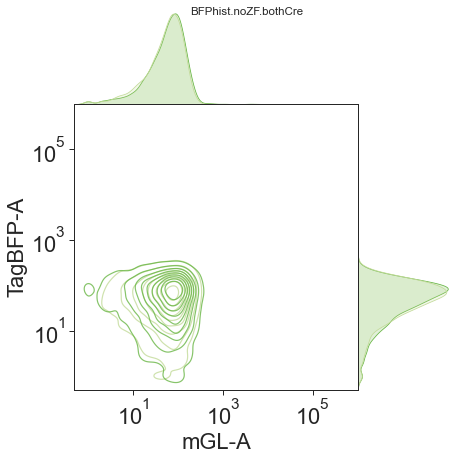

<ipython-input-34-fb01d134c582>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_now_now['Output (mGL)']=data_now_now['mGL-A']
<ipython-input-34-fb01d134c582>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_now_now['Input (ZFa)']=data_now_now['AlexaFluor 555-A']


2277


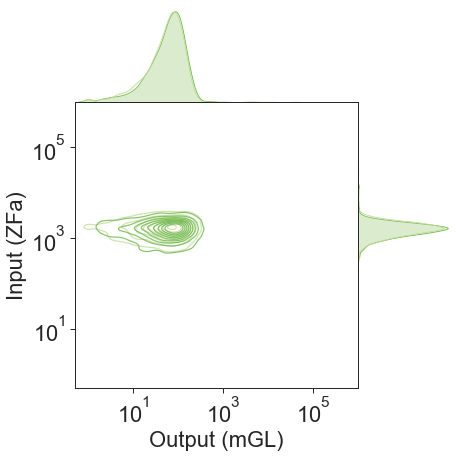

2277


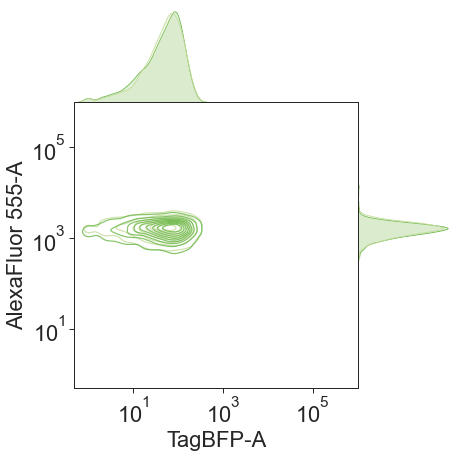

6008


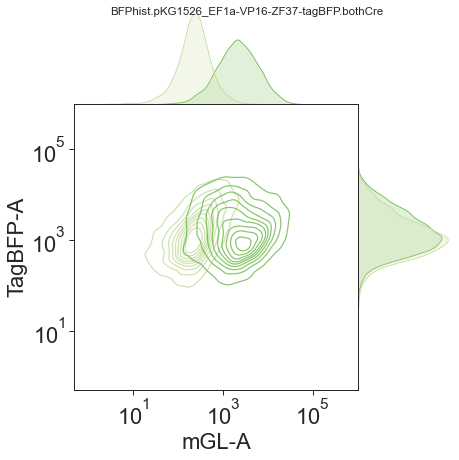

<ipython-input-34-fb01d134c582>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_now_now['Output (mGL)']=data_now_now['mGL-A']
<ipython-input-34-fb01d134c582>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_now_now['Input (ZFa)']=data_now_now['AlexaFluor 555-A']


6008


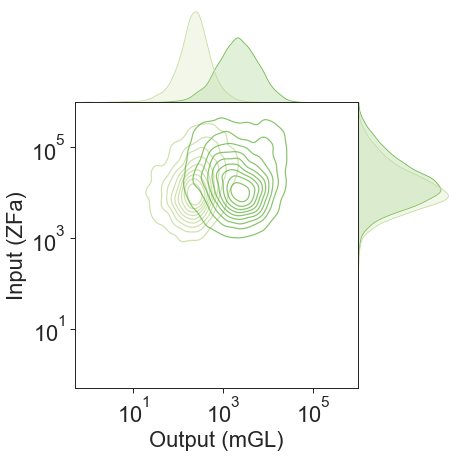

6008


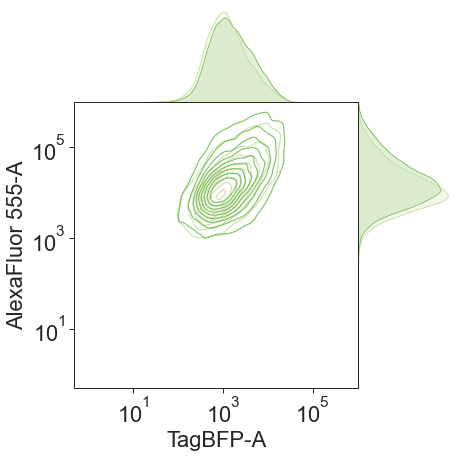

5968


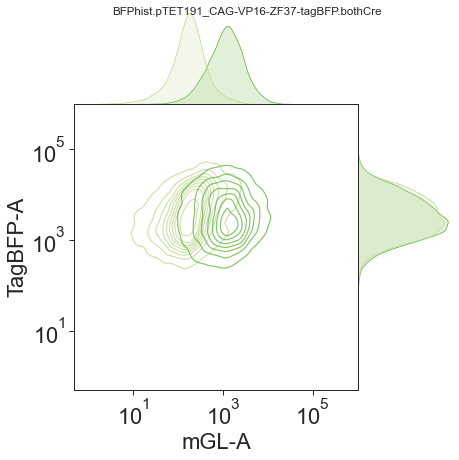

<ipython-input-34-fb01d134c582>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_now_now['Output (mGL)']=data_now_now['mGL-A']
<ipython-input-34-fb01d134c582>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_now_now['Input (ZFa)']=data_now_now['AlexaFluor 555-A']


5968


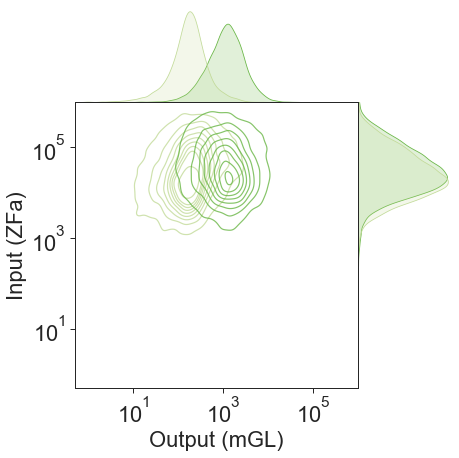

5968


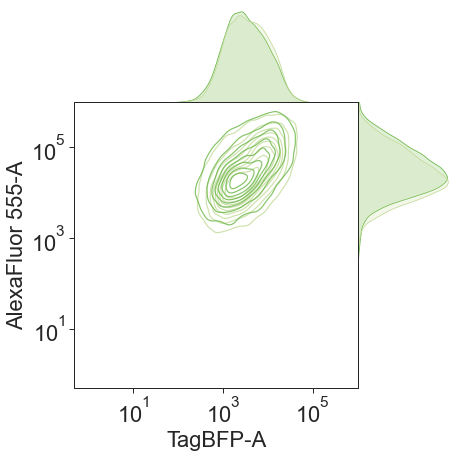

598


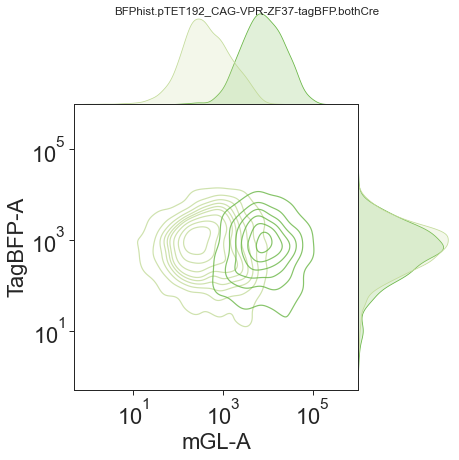

<ipython-input-34-fb01d134c582>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_now_now['Output (mGL)']=data_now_now['mGL-A']
<ipython-input-34-fb01d134c582>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_now_now['Input (ZFa)']=data_now_now['AlexaFluor 555-A']


598


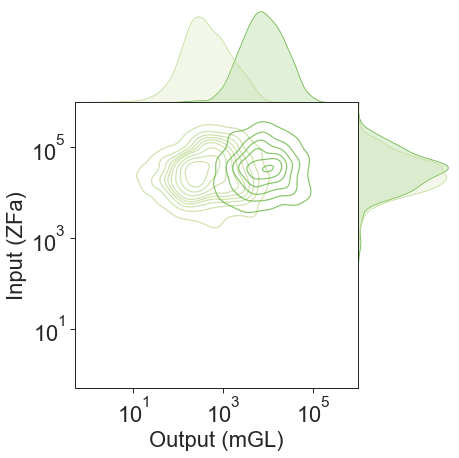

598


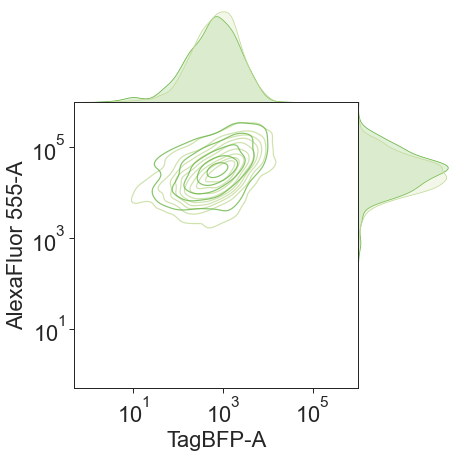

436


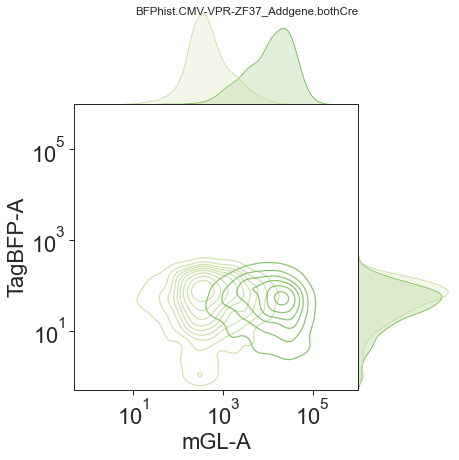

<ipython-input-34-fb01d134c582>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_now_now['Output (mGL)']=data_now_now['mGL-A']
<ipython-input-34-fb01d134c582>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_now_now['Input (ZFa)']=data_now_now['AlexaFluor 555-A']


436


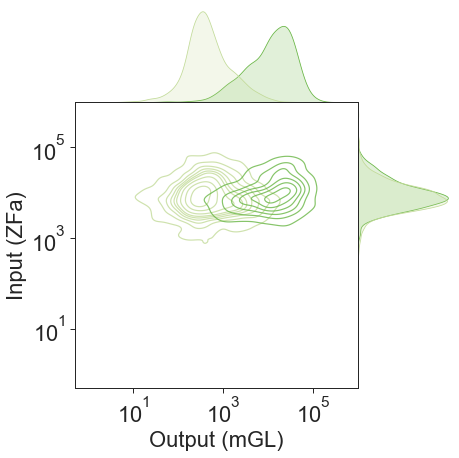

436


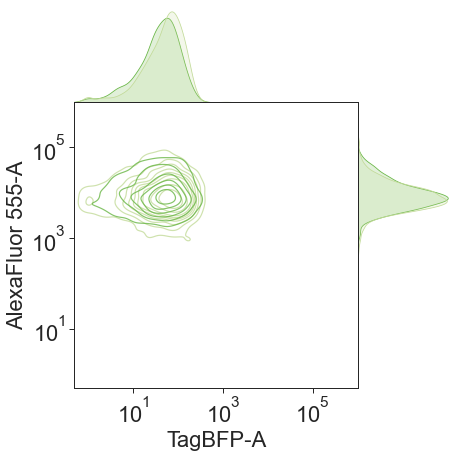

In [34]:
#Create conditions dictionary

hue = 'Cre'
palette = {'noCre':'#C3DB9A',
           'Cre':'#69B645',}

for ZF in pd.unique(data_iRFP670gated['ZF']):
    data_now = data_iRFP670gated[ data_iRFP670gated['ZF']==ZF]

    data_now_now = data_now
    conditions = {}
    
    plottitle = 'BFPhist.' + ZF + '.bothCre'
    h= custom_density_plot(xcat='mGL-A',ycat='TagBFP-A',hue='Cre',data=data_now_now,points = 1e6, 
                    hue_order=None,
                    savetitle='',plottitle=plottitle,palette=palette,
                    xlim=(0.5*10**0, 1*10**6),ylim = (0.5*10**0, 1*10**6),
                    type=['contour'], alpha=0.2, legend=False,
                    hline=False,              # Horizontal line to be added to the plot (float)
                    vline=False,               # Vertical line to be added to the plot (float)
                    sample=False)
    h.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')


    data_now_now['Output (mGL)']=data_now_now['mGL-A']
    data_now_now['Input (ZFa)']=data_now_now['AlexaFluor 555-A']
    plottitle = 'AbAlexa-hist.' + ZF + '.bothCre'
    h= custom_density_plot(xcat='Output (mGL)',ycat='Input (ZFa)',hue='Cre',data=data_now_now,points = 1e6, 
                    hue_order=None,
                    savetitle='',plottitle='',palette=palette,
                    xlim=(0.5*10**0, 1*10**6),ylim = (0.5*10**0, 1*10**6),
                    type=['contour'], alpha=0.2, legend=False,
                    hline=False,              # Horizontal line to be added to the plot (float)
                    vline=False,               # Vertical line to be added to the plot (float)
                    sample=False)
    h.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

    plottitle = 'Alexa-v-BFP.' + ZF + '.bothCre'
    h= custom_density_plot(xcat='TagBFP-A',ycat='AlexaFluor 555-A',hue='Cre',data=data_now_now,points = 1e6, 
                    hue_order=None,
                    savetitle='',plottitle='',palette=palette,
                    xlim=(0.5*10**0, 1*10**6),ylim = (0.5*10**0, 1*10**6),
                    type=['contour'], alpha=0.2, legend=False,
                    hline=False,              # Horizontal line to be added to the plot (float)
                    vline=False,               # Vertical line to be added to the plot (float)
                    sample=False)
    h.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')



# Summary Stats Calculations

In [ ]:
df = data_iRFP670gated

#Decide how to group. The last parameter will be the condition that it is group by by last ('well' or 'bioreplicate')
by = ['reporter', 'ZF_Cre', 'bioreplicate', 'well'] #how to filter results, columns 
x = ['mGL-A', 'TagBFP-A', 'mCherry-A'] #which parameter to calculate results on
stat = [sp.stats.gmean, np.median, np.std, np.mean] #statistics to calculate
s = calc_stats(df,by,x,stat) #calculate statistics 

# Fold Change Calculation

In [ ]:
# normalize all to the +DOX, -GIB conditon with the 203bp spacer

s_repts = s[ s['reporter'] != 'none']
bios = pd.unique(s_repts['bioreplicate'] )
repts = pd.unique(s_repts['reporter'] )

map = {'test':'test'}

for biorep in bios:
    for rept in repts:
        # Normalize all to the noCre ZF37 conditions
        mGL_noCre_ZF37 =  s_repts[ s_repts['ZF_Cre']=='ZF37']
        mGL_noCre_ZF37 =  mGL_noCre_ZF37[ mGL_noCre_ZF37['bioreplicate']==biorep]
        mGL_noCre_ZF37 =  mGL_noCre_ZF37[ mGL_noCre_ZF37['reporter']==rept]
        mGL_noCre_ZF37= mGL_noCre_ZF37['mGL-A_gmean'].iloc[0]
        map[biorep + rept] = mGL_noCre_ZF37
#display(map)

s['map'] = s['bioreplicate'] + s['reporter']
s['ZF'] = s['map'].map(map)
s['Fold Change'] = s['mGL-A_gmean'] / s['ZF']

df = s
by = ['reporter', 'promoter', 'ZF_Cre' ] #how to filter results, columns 
x = ['Fold Change','mGL-A_gmean', 'TagBFP-A_gmean', 'mCherry-A_gmean' ] #which parameter to calculate results on
stat = [np.mean] #statistics to calculate
s_fold = calc_stats(df,by,x,stat) #calculate statistics 
display(s_fold[s_fold['ZF_Cre']=='ZF37_Cre'])

# Summary Plots 

In [ ]:
pairs = []
for i in range(len(pd.unique(s['reporter']))):
    rept = pd.unique(s['reporter'])[i]
    if i == 0:
      pairs = [[(rept, 'ZF37'), (rept, 'ZF37_Cre')]]
    else:
      pairs = pairs + [[(rept, 'ZF37'), (rept, 'ZF37_Cre')]]


In [ ]:

x = 'reporter'; x_rot = 45
xlabel = ''
xsize =6  ; ysize = 3
fontsize = 14
 
yscales = pd.array(['log'])
ylim = [0,10]
pairs = pairs
palette = {'none': '#a4a6a3',
               'Flp': '#7b7d7a', 
   'Cre': '#3d3e3d', 
   'Cre_Flp': '#000000',
     'ZF37': '#ff7d7d',                                                
      'ZF37_Flp': '#b64e4e', 
      'ZF37_Cre':'#960202',
      'ZF37_Cre_Flp':'#3c0101'}
hue = 'ZF_Cre';  hueorder = palette;
order =  pd.unique(data_iRFP670gated['reporter'])
data_now = s

y = 'mCherry-A_gmean'
ylabel = 'Output gmean (mCherry)'
yscale = 'log'
ylim = [3e1, 5e4]
plottitle = y
g = plt.figure(figsize=(xsize,ysize))
g = summary_plot( x, y, hue, data=data_now, dodge=True, palette = palette, order=order, 
                hue_order = hueorder, plottitle='',yscale=yscale,x_rot = x_rot,
                ylim =ylim, fontsize=fontsize, ylabel=ylabel, xticklabels=True, xlabel=xlabel,
                pairs=pairs, legend=False)
g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')


y = 'mGL-A_gmean'
ylabel = 'Output gmean (mGL)'
yscale = 'log'
ylim = [3e1, 5e4]
plottitle = y
g = plt.figure(figsize=(xsize,ysize))
g = summary_plot( x, y, hue, data=data_now, dodge=True, palette = palette, order=order, 
                hue_order = hueorder, plottitle='',yscale=yscale,x_rot = x_rot,
                ylim =ylim, fontsize=fontsize, ylabel=ylabel, xticklabels=True, xlabel=xlabel,
                pairs=pairs, legend=False)
g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')


y = 'TagBFP-A_gmean'
ylabel = 'Input gmean (VP16-ZF37)'
yscale = 'log'
ylim = [3e1, 5e4]
plottitle = y
g = plt.figure(figsize=(xsize,ysize))
g = summary_plot( x, y, hue, data=data_now, dodge=True, palette = palette, order=order, 
                hue_order = hueorder, plottitle='',yscale=yscale,x_rot = x_rot,
                ylim =ylim, fontsize=fontsize, ylabel=ylabel, xticklabels=True, xlabel=xlabel,
                pairs=pairs, legend=False)
g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')
